In [1]:
#zeros(2, 3, 30)

In [2]:
using LinearAlgebra
using Statistics
using Random
using Distributions

In [3]:
# Współczynniki
alpha_11 = 0.85
alpha_12 = 0.1
alpha_21 = 0.5
alpha_22 = 0.5
alpha_23 = 0.0
alpha_31 = 0.12
alpha_32 = 0.12
M_przez_S = 0.3
S_przez_M = 1 / M_przez_S
alpha_13 = (1 - (alpha_11 + alpha_21*alpha_12/(1 - alpha_22)))*S_przez_M
alpha_33 = (1 - (alpha_31 + alpha_32*alpha_21/(1 - alpha_22))*S_przez_M);

In [4]:
# Macierz układu
A = [alpha_11 alpha_12 alpha_13; alpha_21 alpha_22 alpha_23; alpha_31 alpha_32 alpha_33]

3×3 Matrix{Float64}:
 0.85  0.1   0.166667
 0.5   0.5   0.0
 0.12  0.12  0.2

In [5]:
#Warunki początkowe
S = 5.0e6
D = 5.0e6
M = M_przez_S * D
X_0 = [D, S, M]
T = 100
# Sprawdzamy poprawność
#println("Okołopoprawne? ", A*X_0 ≈ X_0)
println("Poprawne? ", A*X_0 == X_0)

Poprawne? true


In [59]:
print(X_0)

[5.0e6, 5.0e6, 1.5e6]

In [7]:
M

1.5e6

In [8]:
X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [9]:
A*X_0

3-element Vector{Float64}:
 5.0e6
 5.0e6
 1.5e6

In [10]:
# Tablice zmiennych
Z_D = 5000
X_D_zakł = zeros(Z_D, 3, T)
D_zakł = zeros(Z_D, T);

In [11]:
# Rozkład Gumbela dla zakłóceń
#==#
μ = 0.0
λ = 2.5*10^(3)
Gumbel_distr_1 = Gumbel(μ,λ)
D_zakł[:, 2:T] .= rand(Gumbel_distr_1, Z_D, T-1)



5000×99 view(::Matrix{Float64}, :, 2:100) with eltype Float64:
  -163.394     426.079    189.382   …   -438.683    1251.35     4244.06
  1968.65     -201.374   1120.69        -402.293    1701.07    -1169.48
  5369.17     1329.42    4944.17        2613.43     1402.26     2795.2
 -2082.43     -913.108   2441.99        -597.742   -1275.83      531.924
  6135.66     -247.302  -1126.44         -66.6732   2314.43     7393.41
  2245.13     1411.88    4695.26    …    810.835   -2472.63    -3487.1
  1140.62      502.382   -969.004       1525.82     1601.65     -630.392
    72.7039  -3552.21    1028.37        1676.38     -253.089    3541.68
  3693.89     1722.71   11951.8         3159.97    -2917.36    -1769.75
  -281.168   -1890.46   -3136.76        1432.73      741.378   -2829.49
   819.168    -675.42   10545.3     …   6246.11    -1204.4     -1912.41
  -661.087     427.588    204.636       6043.62     5391.4     -3410.53
   934.699     657.731  -1862.22        5156.99     -198.405   -2142.16
 

In [49]:
?Gumbel

search: Gumbel Gumbel_distr_1



```
Gumbel(μ, θ)
```

The *Gumbel (maxima) distribution*  with location `μ` and scale `θ` has probability density function

$$
f(x; \mu, \theta) = \frac{1}{\theta} e^{-(z + e^{-z})},
\quad \text{ with } z = \frac{x - \mu}{\theta}
$$

```julia
Gumbel()            # Gumbel distribution with zero location and unit scale, i.e. Gumbel(0, 1)
Gumbel(μ)           # Gumbel distribution with location μ and unit scale, i.e. Gumbel(μ, 1)
Gumbel(μ, θ)        # Gumbel distribution with location μ and scale θ

params(d)        # Get the parameters, i.e. (μ, θ)
location(d)      # Get the location parameter, i.e. μ
scale(d)         # Get the scale parameter, i.e. θ
```

External links

  * [Gumbel distribution on Wikipedia](http://en.wikipedia.org/wiki/Gumbel_distribution)


In [13]:
using JLD2
@save "D_zakł.jld2" D_zakł

In [14]:
#= INNA MOŻLIWOŚĆ
using HDF5
# Save the matrix as an HDF5 file
h5write("D_zakł_HDF5.h5", "/dataset", D_zakł)
POZWALA NA HIERARCHICZNY ZAPIS DANYCH ITP.
=#

In [15]:
D_zakł_wczytane = load("D_zakł.jld2")

Dict{String, Any} with 1 entry:
  "D_zakł" => [0.0 -163.394 … 1251.35 4244.06; 0.0 1968.65 … 1701.07 -1169.48; …

In [16]:
typeof(D_zakł_wczytane)

Dict{String, Any}

In [17]:
typeof(D_zakł_wczytane["D_zakł"])

Matrix{Float64} (alias for Array{Float64, 2})

In [18]:
D_zakł = D_zakł_wczytane["D_zakł"]

5000×100 Matrix{Float64}:
 0.0   -163.394     426.079    189.382   …   -438.683    1251.35     4244.06
 0.0   1968.65     -201.374   1120.69        -402.293    1701.07    -1169.48
 0.0   5369.17     1329.42    4944.17        2613.43     1402.26     2795.2
 0.0  -2082.43     -913.108   2441.99        -597.742   -1275.83      531.924
 0.0   6135.66     -247.302  -1126.44         -66.6732   2314.43     7393.41
 0.0   2245.13     1411.88    4695.26    …    810.835   -2472.63    -3487.1
 0.0   1140.62      502.382   -969.004       1525.82     1601.65     -630.392
 0.0     72.7039  -3552.21    1028.37        1676.38     -253.089    3541.68
 0.0   3693.89     1722.71   11951.8         3159.97    -2917.36    -1769.75
 0.0   -281.168   -1890.46   -3136.76        1432.73      741.378   -2829.49
 0.0    819.168    -675.42   10545.3     …   6246.11    -1204.4     -1912.41
 0.0   -661.087     427.588    204.636       6043.62     5391.4     -3410.53
 0.0    934.699     657.731  -1862.22        5156.

In [19]:
Wektory_D_zakł = zeros(Z_D, 3, T)
Wektory_D_zakł[:, 1, :] .= D_zakł

5000×100 view(::Array{Float64, 3}, :, 1, :) with eltype Float64:
 0.0   -163.394     426.079    189.382   …   -438.683    1251.35     4244.06
 0.0   1968.65     -201.374   1120.69        -402.293    1701.07    -1169.48
 0.0   5369.17     1329.42    4944.17        2613.43     1402.26     2795.2
 0.0  -2082.43     -913.108   2441.99        -597.742   -1275.83      531.924
 0.0   6135.66     -247.302  -1126.44         -66.6732   2314.43     7393.41
 0.0   2245.13     1411.88    4695.26    …    810.835   -2472.63    -3487.1
 0.0   1140.62      502.382   -969.004       1525.82     1601.65     -630.392
 0.0     72.7039  -3552.21    1028.37        1676.38     -253.089    3541.68
 0.0   3693.89     1722.71   11951.8         3159.97    -2917.36    -1769.75
 0.0   -281.168   -1890.46   -3136.76        1432.73      741.378   -2829.49
 0.0    819.168    -675.42   10545.3     …   6246.11    -1204.4     -1912.41
 0.0   -661.087     427.588    204.636       6043.62     5391.4     -3410.53
 0.0    934

In [20]:
size(Wektory_D_zakł)

(5000, 3, 100)

In [21]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
for i in range(1,Z_D)
    X_D_zakł[i, :, 1] .= X_0
end

In [22]:
X_D_zakł[:, :, 1] .= transpose(X_0)

5000×3 view(::Array{Float64, 3}, :, :, 1) with eltype Float64:
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 ⋮             
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6
 5.0e6  5.0e6  1.5e6

In [23]:
size(X_D_zakł)

(5000, 3, 100)

In [33]:
temp = copy(X_D_zakł)
print(size(X_D_zakł))
X_D_zakł[1,:,1:100]

(5000, 3, 100)

3×100 Matrix{Float64}:
 5.0e6  4.83661e6  5.28719e6  5.42206e6  …  9.03094e7  9.14079e7  9.54118e7
 5.0e6  5.0e6      4.9183e6   5.10275e6     8.94144e7  8.98619e7  9.06349e7
 1.5e6  1.5e6      1.48039e6  1.52074e6     2.67126e7  2.69094e7  2.71342e7

In [35]:
?Gumbel

search: Gumbel Gumbel_distr_1



```
Gumbel(μ, θ)
```

The *Gumbel (maxima) distribution*  with location `μ` and scale `θ` has probability density function

$$
f(x; \mu, \theta) = \frac{1}{\theta} e^{-(z + e^{-z})},
\quad \text{ with } z = \frac{x - \mu}{\theta}
$$

```julia
Gumbel()            # Gumbel distribution with zero location and unit scale, i.e. Gumbel(0, 1)
Gumbel(μ)           # Gumbel distribution with location μ and unit scale, i.e. Gumbel(μ, 1)
Gumbel(μ, θ)        # Gumbel distribution with location μ and scale θ

params(d)        # Get the parameters, i.e. (μ, θ)
location(d)      # Get the location parameter, i.e. μ
scale(d)         # Get the scale parameter, i.e. θ
```

External links

  * [Gumbel distribution on Wikipedia](http://en.wikipedia.org/wiki/Gumbel_distribution)


In [25]:
print(size(Wektory_D_zakł))
1000*Wektory_D_zakł[1:4,:,1:5]

(5000, 3, 100)

4×3×5 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 2] =
 -1.63394e5  0.0  0.0
  1.96865e6  0.0  0.0
  5.36917e6  0.0  0.0
 -2.08243e6  0.0  0.0

[:, :, 3] =
  4.26079e5  0.0  0.0
 -2.01374e5  0.0  0.0
  1.32942e6  0.0  0.0
 -9.13108e5  0.0  0.0

[:, :, 4] =
 1.89382e5  0.0  0.0
 1.12069e6  0.0  0.0
 4.94417e6  0.0  0.0
 2.44199e6  0.0  0.0

[:, :, 5] =
  2.01782e6  0.0  0.0
 -4.57576e5  0.0  0.0
  1.61722e6  0.0  0.0
  1.8562e6   0.0  0.0

In [53]:
#Powtórzenia układu - symulacja
size(X_D_zakł[:, :, 1])
size(X_0)
X_D_zakł[:, :, 1] .= transpose(X_0);
print(Z_D)
for z in 1:Z_D
    for t in 2:T
    # X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1]
    X_D_zakł[z, :, t] = A * X_D_zakł[z, :, t-1] + Wektory_D_zakł[z, :, t]
        if t == 2 && z == 2
            # println([X_D_zakł[z, :, t], X_D_zakł[z, :, t-1], 1000*Wektory_D_zakł[z, :, t]])
        end
    end
end

5000

In [56]:
# Confidence intervals and statistics
CI_D_5p_min_D_zakł = zeros(T)
CI_D_5p_max_D_zakł = zeros(T)
CI_S_5p_min_D_zakł = zeros(T)
CI_S_5p_max_D_zakł = zeros(T)
CI_M_5p_min_D_zakł = zeros(T)
CI_M_5p_max_D_zakł = zeros(T)
UPORZADKOWANE_D = zeros(Z_D, T)
UPORZADKOWANE_S = zeros(Z_D, T)
UPORZADKOWANE_M = zeros(Z_D, T)
for t in 1:T
    UPORZADKOWANE_D[:, t] = sort(X_D_zakł[:, 1, t])
    CI_D_5p_min_D_zakł[t] = UPORZADKOWANE_D[250, t]
    CI_D_5p_max_D_zakł[t] = UPORZADKOWANE_D[4750, t]
    UPORZADKOWANE_S[:, t] = sort(X_D_zakł[:, 2, t])
    CI_S_5p_min_D_zakł[t] = UPORZADKOWANE_S[250, t]
    CI_S_5p_max_D_zakł[t] = UPORZADKOWANE_S[4750, t]
    UPORZADKOWANE_M[:, t] = sort(X_D_zakł[:, 3, t])
    CI_M_5p_min_D_zakł[t] = UPORZADKOWANE_M[250, t]
    CI_M_5p_max_D_zakł[t] = UPORZADKOWANE_M[4750, t]
end
CI_D_średnia_D_zakł = zeros(T)
CI_S_średnia_D_zakł = zeros(T)
CI_M_średnia_D_zakł = zeros(T)
CI_D_mediana_D_zakł = zeros(T)
CI_S_mediana_D_zakł = zeros(T)
CI_M_mediana_D_zakł = zeros(T)
CI_D_średnia_D_zakł[:] = mean(X_D_zakł[:, 1, :], dims=1)
CI_S_średnia_D_zakł[:] = mean(X_D_zakł[:, 2, :], dims=1)
CI_M_średnia_D_zakł[:] = mean(X_D_zakł[:, 3, :], dims=1)
CI_D_mediana_D_zakł[:] = median(X_D_zakł[:, 1, :], dims=1)
CI_S_mediana_D_zakł[:] = median(X_D_zakł[:, 2, :], dims=1)
CI_M_mediana_D_zakł[:] = median(X_D_zakł[:, 3, :], dims=1)

1×100 Matrix{Float64}:
 1.5e6  1.5e6  1.50011e6  1.50036e6  …  1.53137e6  1.53166e6  1.53195e6

In [28]:
#typeof(CI_M_mediana_D_zakł)

In [29]:
using Plots

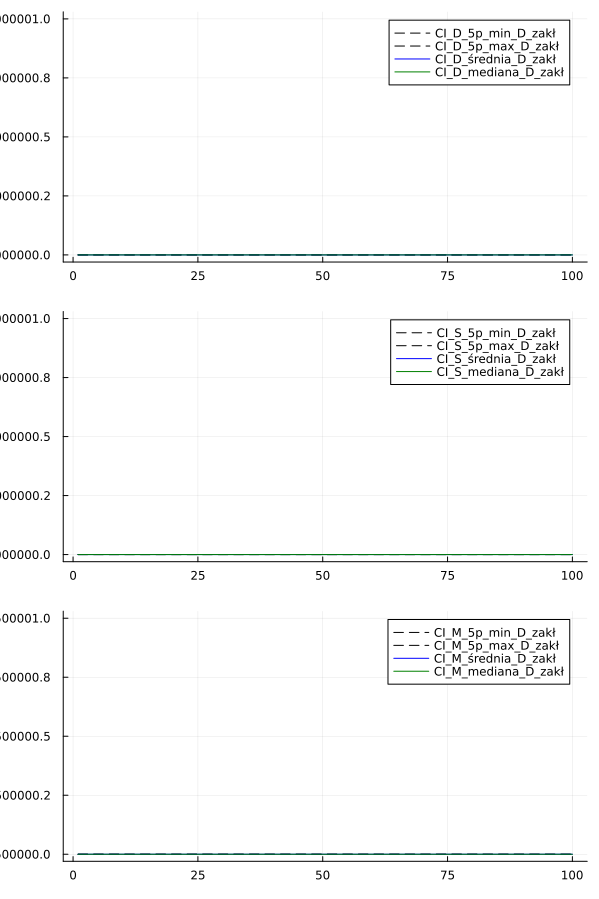

"C:\\Users\\rados\\OneDrive - SGH\\Semestr 8\\ZMS\\projekty_ZMS\\raport_1\\plot.svg"

In [54]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (600, 900)) # Trzy (pod)wykresy pionowo
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
savefig(p, "plot.svg")
#UWAGA, BRZYDKO WYCHODZI - TRZEBA BĘDZIE DOSTOSOWAĆ WYKRES!


In [31]:
CI_M_mediana_D_zakł

100-element Vector{Float64}:
 1.5e6
 1.5e6
 1.612150105909761e6
 1.8565326919301357e6
 2.177541127008538e6
 2.4817262322042296e6
 2.776991167207302e6
 3.1038087958407393e6
 3.449398265326892e6
 3.7749981373443715e6
 4.127744715828429e6
 4.441816837631747e6
 4.767169645375924e6
 ⋮
 2.979270084424894e7
 3.0151178915115535e7
 3.0482789898110457e7
 3.0810220186408706e7
 3.1100631558361802e7
 3.147165492562624e7
 3.1791181572255377e7
 3.2175745203654848e7
 3.2419988626482822e7
 3.287200654819315e7
 3.3158125290199555e7
 3.3452435110598985e7

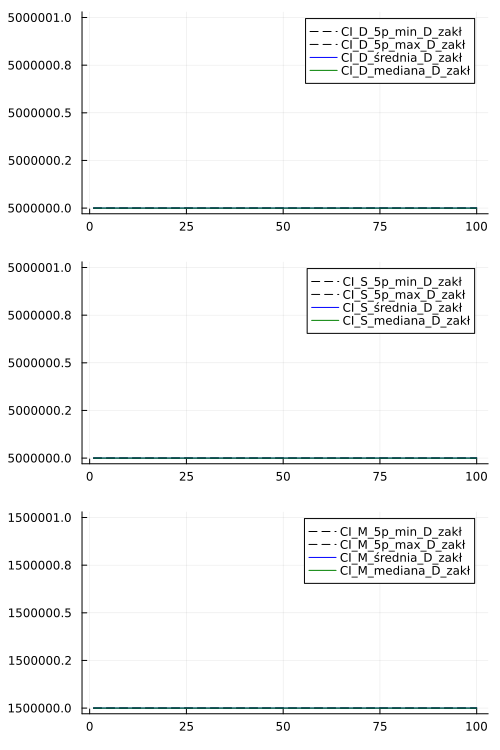

In [55]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (3, 1), size = (500, 750),left_margin = 6Plots.mm) # POSZERZAMY L
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D_mediana_D_zakł")
# Subplot 2
plot!(p[2], 1:T, CI_S_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_min_D_zakł")
plot!(p[2], 1:T, CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_S_5p_max_D_zakł")
plot!(p[2], 1:T, CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_S_średnia_D_zakł")
plot!(p[2], 1:T, CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_S_mediana_D_zakł")
# Subplot 3
plot!(p[3], 1:T, CI_M_5p_min_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_min_D_zakł")
plot!(p[3], 1:T, CI_M_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_M_5p_max_D_zakł")
plot!(p[3], 1:T, CI_M_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_M_średnia_D_zakł")
plot!(p[3], 1:T, CI_M_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_M_mediana_D_zakł")
# Display the plot
display(p)
#
#savefig(p, "plot_rzd2.svg")

Jak krztałtuje się relacja popytu do podaży? Czy rynek znajduje się w równowadze?

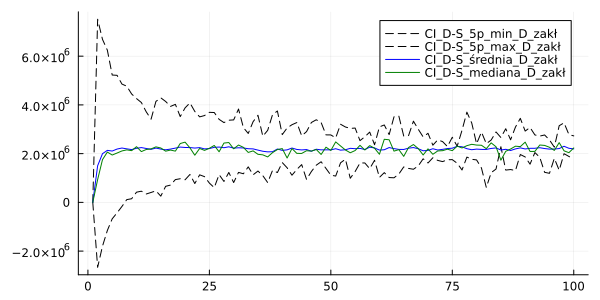

"C:\\Users\\rados\\OneDrive - SGH\\Semestr 8\\ZMS\\projekty_ZMS\\raport_1\\plot.svg"

In [42]:
# Rysowanie - rysunek z trzema (pod)wykresami
p = plot(layout = (1, 1), size = (600, 300)) # Trzy (pod)wykresy pionowo
T=100
# Subplot 1
plot!(p[1], 1:T, CI_D_5p_min_D_zakł- CI_S_5p_min_D_zakł , color=:black, linestyle=:dash, label="CI_D-S_5p_min_D_zakł")
plot!(p[1], 1:T, CI_D_5p_max_D_zakł - CI_S_5p_max_D_zakł, color=:black, linestyle=:dash, label="CI_D-S_5p_max_D_zakł")
plot!(p[1], 1:T, CI_D_średnia_D_zakł - CI_S_średnia_D_zakł, color=:blue, linestyle=:solid, label="CI_D-S_średnia_D_zakł")
plot!(p[1], 1:T, CI_D_mediana_D_zakł - CI_S_mediana_D_zakł, color=:green, linestyle=:solid, label="CI_D-S_mediana_D_zakł")

# Display the plot
display(p)
#
# savefig(p, "plot.svg")
#Obserwujemy nadwyżkę popytu nad podażą 